<a href="https://colab.research.google.com/github/jon-chun/sentimenttime/blob/main/ts_hierarchical_clustering_with_DTW_20210808.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Hierarichal Clustering with DTW**

* https://towardsdatascience.com/how-to-apply-hierarchical-clustering-to-time-series-a5fe2a7d8447
* https://learning.oreilly.com/library/view/practical-statistics-for/9781491952955/

## **Setup and Configuration**

In [ ]:
!pip install sktime

In [41]:
import re

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [28]:
from sktime.distances.elastic_cython import dtw_distance

In [29]:
from sktime.datasets.base import load_italy_power_demand
data = load_italy_power_demand()

In [30]:
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram

In [31]:
# Reshape the data so each series is a column and call the dataframe.corr() function 
distance_matrix = pd.concat([series for series in data['dim_0'].values], axis=1).corr()

In [32]:
from scipy.cluster.hierarchy import fcluster

In [71]:
import statsmodels.api as sm

In [37]:
# Connect to Google gDrive

# Flag to indicate first run through code 
flag_first_run = True

from google.colab import drive, files
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Mounted at /gdrive
/gdrive/MyDrive


In [39]:
gdrive_subdir = "./research/2021/sa_book_code/books_sa/imcewan_machineslikeme" #@param {type:"string"}

CORPUS_SUBDIR = gdrive_subdir
corpus_filename = CORPUS_SUBDIR

# Change to working subdirectory
if flag_first_run == True:
  full_path_str = gdrive_subdir
  flag_first_run = False
else:
  full_path_str = f'/gdrive/MyDrive{gdrive_subdir[1:]}'

%cd $full_path_str

/gdrive/MyDrive/research/2021/sa_book_code/books_sa/imcewan_machineslikeme


In [42]:
# CORPUS_TITLE = 'Heart of Darkness' #@param {type:"string"}
# CORPUS_AUTHOR = "Joseph Conrad" #@param {type:"string"}
# CORPUS_FILENAME = "jconrad_heartofdarkness.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/jconrad_heartofdarkness" #@param {type:"string"}

# CORPUS_TITLE = 'Great Expectations' #@param {type:"string"}
# CORPUS_AUTHOR = "Charles Dickens" #@param {type:"string"}
# CORPUS_FILENAME = "cdickens_greatexpectations.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/cdickens_greatexpectations" #@param {type:"string"}

# CORPUS_TITLE = 'Howards End' #@param {type:"string"}
# CORPUS_AUTHOR = "EM Forster" #@param {type:"string"}
# CORPUS_FILENAME = "emforster_howardsend.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/emforster_howardsend" #@param {type:"string"}

# CORPUS_TITLE = 'Portrait of a Lady' #@param {type:"string"}
# CORPUS_AUTHOR = "Henry James" #@param {type:"string"}
# CORPUS_FILENAME = "hjames_portraitofalady.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/hjames_portraitofalady" #@param {type:"string"}

CORPUS_TITLE = 'Machines Like Me' #@param {type:"string"}
CORPUS_AUTHOR = "Ian McEwan" #@param {type:"string"}
CORPUS_FILENAME = "imcewan_machineslikeme.txt" #@param {type:"string"}
CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/imcewan_machineslikeme" #@param {type:"string"}

# CORPUS_TITLE = 'Robinson Crusoe' #@param {type:"string"}
# CORPUS_AUTHOR = "Daniel Defoe" #@param {type:"string"}
# CORPUS_FILENAME = "ddefoe_robinsoncrusoe.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/ddefoe_robinsoncrusoe" #@param {type:"string"}

# CORPUS_TITLE = 'Middlemarch' #@param {type:"string"}
# CORPUS_AUTHOR = "George Eliot" #@param {type:"string"}
# CORPUS_FILENAME = "geliot_middlemarch_wprelude.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/geliot_middlemarch"  #@param {type:"string"}

# CORPUS_TITLE = 'Palefire - Commentary' #@param {type:"string"}
# CORPUS_AUTHOR = "Vladimir Nabokov" #@param {type:"string"}
# CORPUS_FILENAME = "vnabokov_palefire_commentary.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/vnabokov_palefire" #@param {type:"string"}

# CORPUS_TITLE = 'The Great Gatsby' #@param {type:"string"}
# CORPUS_AUTHOR = "F. Scott Fitzgerald" #@param {type:"string"}
# CORPUS_FILENAME = "fscottfitzgerald_thegreatgatsby.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/fscottfitzgerald_thegreatgatsby" #@param {type:"string"}

# CORPUS_TITLE = 'The Socerers Stone' #@param {type:"string"}
# CORPUS_AUTHOR = "J.K. Rowling" #@param {type:"string"}
# CORPUS_FILENAME = "hpotter1_sorcerersstone.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/jkrowling_harrypotter" #@param {type:"string"}

# CORPUS_TITLE = 'Portrait of the Artist as a Young Man' #@param {type:"string"}
# CORPUS_AUTHOR = "James Joyce" #@param {type:"string"}
# CORPUS_FILENAME = "jjoyce_portraitoftheartist.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/jjoyce_portraitoftheartist" #@param {type:"string"}

# CORPUS_TITLE = 'Confessions' #@param {type:"string"}
# CORPUS_AUTHOR = "Saint Augustine" #@param {type:"string"}
# CORPUS_FILENAME = "staugustine_confessions.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/staugustine_confessions"  #@param {type:"string"}

# CORPUS_TITLE = 'Narrative Life of Frederick Douglass' #@param {type:"string"}
# CORPUS_AUTHOR = "Frederick Douglass" #@param {type:"string"}
# CORPUS_FILENAME = "fdouglass_narrative.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/fdouglass_narrativelifeslave"  #@param {type:"string"}

# CORPUS_TITLE = 'Orlando' #@param {type:"string"}
# CORPUS_AUTHOR = "Virginia Woolf" #@param {type:"string"}
# CORPUS_FILENAME = "vwoolf_orlando.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/vwoolf_orlando" #@param {type:"string"}

# CORPUS_TITLE = 'The Waves' #@param {type:"string"}
# CORPUS_AUTHOR = "Virginia Woolf" #@param {type:"string"}
# CORPUS_FILENAME = "vwoolf_thewaves.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/vwoolf_thewaves" #@param {type:"string"}

# CORPUS_TITLE = 'Mrs. Dalloway' #@param {type:"string"}
# CORPUS_AUTHOR = "Virginia Woolf" #@param {type:"string"}
# CORPUS_FILENAME = "vwoolf_mrsdalloway.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/vwoolf_mrsdalloway" #@param {type:"string"}

# CORPUS_TITLE = 'To The Lighthouse' #@param {type:"string"}
# CORPUS_AUTHOR = "Virginia Woolf" #@param {type:"string"}
# CORPUS_FILENAME = "vwoolf_tothelighthouse.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/vwoolf_tothelighthouse" #@param {type:"string"}

# CORPUS_TITLE = 'The Odyssey' #@param {type:"string"}
# CORPUS_AUTHOR = "Homer SButler" #@param {type:"string"}
# CORPUS_FILENAME = "sbutler_odyssey.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/sbutler_odyssey"  #@param {type:"string"}

# CORPUS_TITLE = 'The Odyssey' #@param {type:"string"}
# CORPUS_AUTHOR = "Homer EWilson" #@param {type:"string"}
# CORPUS_FILENAME = "ewilson_odyssey.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/homer_odyssey"  #@param {type:"string"}

# CORPUS_TITLE = 'Beloved' #@param {type:"string"}
# CORPUS_AUTHOR = "Toni Morrison" #@param {type:"string"}
# CORPUS_FILENAME = "tmorrison_beloved.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/tmorrison_belovedy"  #@param {type:"string"}

# CORPUS_TITLE = 'The Guermantes Way - English' #@param {type:"string"}
# CORPUS_AUTHOR = "Marcel Proust" #@param {type:"string"}
# CORPUS_FILENAME = "mproust_3guermantesway_mtreharne_en.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/mproust_time"  #@param {type:"string"}

# CORPUS_TITLE = 'The Guermantes Way - French' #@param {type:"string"}
# CORPUS_AUTHOR = "Marcel Proust" #@param {type:"string"}
# CORPUS_FILENAME = "mproust_guermantes_fr.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/mproust_time"  #@param {type:"string"}

CORPUS_LANGUAGE = "English" #@param ["English", "French"]

CHAPTER_HEADINGS = "CHAPTER" #@param ["CHAPTER", "BOOK", "None"]
CHAPTER_NUMBERING = "Arabic (1,2,...)" #@param ["Arabic (1,2,...)", "Roman (I,II,...)"]
SECTION_HEADINGS = "None" #@param ["SECTION (ArabicNo)", "SECTION (RomanNo)", "----- (Hyphens)", "None"]

LEXICONS_SUBDIR = "./research/2021/sa_book_code/books_sa/lexicons" #@param {type:"string"}

CORPUS_FULL = f'{CORPUS_TITLE} by: {CORPUS_AUTHOR}'

PLOT_OUTPUT = "Major" #@param ["None", "Major", "All"]

FILE_OUTPUT = "Major" #@param ["None", "Major", "All"]


gdrive_subdir = CORPUS_SUBDIR
corpus_filename = CORPUS_FILENAME
CORPUS_LANGUAGE = CORPUS_LANGUAGE.lower()
author_str = ''.join(CORPUS_AUTHOR.split()).lower()
author_abbr_str = (CORPUS_AUTHOR.split(' ')[0][0]+CORPUS_AUTHOR.split(' ')[1]).lower()
title_str = ''.join(CORPUS_TITLE.split()).lower()
title_str = re.sub(r'[^A-Za-z0-9]','', title_str).lower()

print(f'\nWorking Corpus Datafile: ------------------------------ \n\n    {CORPUS_SUBDIR}')
print(f'\nFull Corpus Title/Author: ------------------------------ \n\n    {CORPUS_FULL}')


if CHAPTER_HEADINGS == 'CHAPTER':
  if CHAPTER_NUMBERING == "Arabic (1,2,...)":
    # pattern_chap = r'CHAPTER [0123456789]{1,2} ' # [\.]?[^\n]*'
    pattern_chap = r'CHAPTER [0123456789]{1,2}[.]?[^\n]*' # [os.return]*'
  elif CHAPTER_NUMBERING == "Roman (I,II,...)":
    pattern_chap = r'CHAPTER[\s]{1,5}[IVXL]{1,10}[.:]?[\s]+' # [^\n]+'
    # pattern_chap = r'CHAPTER[\s]{1,}[IVXL]{1,10}[.:]?[^\n\r]*'
  else:
    print(f'ERROR: Illegal CHAPTER_NUMBERING value = {CHAPTER_NUMBERING}')

elif CHAPTER_HEADINGS == 'BOOK':
  if CHAPTER_NUMBERING == "Arabic (1,2,...)":
    pattern_chap = r'BOOK [0123456789]{1,2}[.]?[^\n]*'
  elif CHAPTER_NUMBERING == "Roman (I,II,...)":
    pattern_chap = r'[\s]*BOOK[\s]{1,5}[IVXL]{1,10}[.:]?[\s]+' # [.:]?[\s]*[^\n]*[\n\r]+' # ]{0,1}[^\n]*' # [^\n]*' # Problems with embedded 'Book'
  else:
    print(f'ERROR: Illegal CHAPTER_NUMBERING value = {CHAPTER_NUMBERING}')

elif CHAPTER_HEADINGS == "None":
  pattern_chap = r'CHAPTER [0123456789]{1,2}[.]?[^\n]*'

else:
  print(f'ERROR: Illegal CHAPTER_HEADINGS value = {CHAPTER_HEADINGS}')

# Default Section RegEx Pattern
pattern_sect = 'SECTION [0123456789]{1,2}[^\n]*'

if SECTION_HEADINGS == 'SECTION (ArabicNo)':
  # pattern_sect = r'SECTION [0-9]{1,2} [^\n]*'
  # TODO: [^\n] gets parsed into [^\\n] causing problems, so simplify
  pattern_sect = r'SECTION [0123456789]{1,2}[.:]?[^\n]*'
elif SECTION_HEADINGS == 'SECTION (RomanNo)':
  pattern_sect = r'SECTION [IVXL]{1,10}[.:]?[^\n\r]+' # } [A-Z \.-:—;-’\'"]*[\n]*'
elif SECTION_HEADINGS == '----- (Hyphens)':
  pattern_sect = r'^[- ]{3,}[^\n]*'
elif SECTION_HEADINGS == 'None':
  pass
else:
  print(f'ERROR: Illegal SECTION_HEADING value = {SECTION_HEADINGS}')

print(f'\nCHAPTER Headings: ------------------------------ \n\n    {CHAPTER_HEADINGS}')

print(f'\nSECTION Headings: ------------------------------ \n\n    {SECTION_HEADINGS}')


print(f'\nCorpus file information: ------------------------------ \n')
!ls -al $CORPUS_FILENAME

# Verify contents of Corpus File is Correctly Formatted
#   
# TODO: ./utils/verify_format.py



Working Corpus Datafile: ------------------------------ 

    ./research/2021/sa_book_code/books_sa/imcewan_machineslikeme

Full Corpus Title/Author: ------------------------------ 

    Machines Like Me by: Ian McEwan

CHAPTER Headings: ------------------------------ 

    CHAPTER

SECTION Headings: ------------------------------ 

    None

Corpus file information: ------------------------------ 

-rw------- 1 root root 514059 Aug  3 09:48 imcewan_machineslikeme.txt


In [44]:
!ls -altr *.csv

-rw------- 1 root root  66212309 Oct 19  2019 'IMDB Dataset.csv'
-rw------- 1 root root    569866 Jun  7 17:09  mlm_sentences_vader.csv
-rw------- 1 root root    558810 Jun  7 22:43  mlm_sentiment_huliu.csv
-rw------- 1 root root    568010 Jun  7 22:51  mlm_sentiment_syuzhet.csv
-rw------- 1 root root    608479 Jun  7 22:51  mlm_sentiment_senticnet.csv
-rw------- 1 root root    591246 Jun  7 22:52  mlm_sentiment_sentiword.csv
-rw------- 1 root root    568001 Jun  7 22:53  mlm_sentiment_jockers_rinker.csv
-rw------- 1 root root    565803 Jun  7 22:54  mlm_sentiment_textblob.csv
-rw------- 1 root root    569866 Jun  7 22:55  mlm_sentiment_vader.csv
-rw------- 1 root root    680596 Jun  8 09:01  mlm_roll500_sentiments_all.csv
-rw------- 1 root root    345144 Jun  8 09:03  mlm_raw_sentiments_all.csv
-rw------- 1 root root    692269 Jun  8 10:15  mlm_raw_trained_imdb_bert.csv
-rw------- 1 root root    371029 Jun  8 10:20  mlm_raw_distbertsst_all.csv
-rw------- 1 root root    700766 Jun  8 1

In [46]:
corpus_sents_df = pd.read_csv('sum_sentiments_sents_sentimentr_imcewan_machineslikeme.csv')

In [52]:
corpus_sents_df.head(2)
# corpus_sents_df.info()
[print(f'{x}\n') for x in corpus_sents_df.columns]
len(corpus_sents_df.columns)

Unnamed: 0

sent_no

sent_raw

jockers_rinker

jockers

huliu

lmcd

nrc

senticnet

sentiword

token_len

char_len

jockers_rinker_lnorm

jockers_lnorm

huliu_lnorm

senticnet_lnorm

sentiword_lnorm

nrc_lnorm

lmcd_lnorm

jockers_rinker_minmax

jockers_minmax

huliu_minmax

senticnet_minmax

sentiword_minmax

nrc_minmax

lmcd_minmax

jockers_rinker_stdscaler

jockers_stdscaler

huliu_stdscaler

senticnet_stdscaler

sentiword_stdscaler

nrc_stdscaler

lmcd_stdscaler

jockers_rinker_medianiqr

jockers_medianiqr

huliu_medianiqr

senticnet_medianiqr

sentiword_medianiqr

nrc_medianiqr

lmcd_medianiqr

jockers_rinker_roll10

jockers_roll10

huliu_roll10

senticnet_roll10

sentiword_roll10

nrc_roll10

lmcd_roll10

jockers_rinker_lnorm_minmax

jockers_lnorm_minmax

huliu_lnorm_minmax

senticnet_lnorm_minmax

sentiword_lnorm_minmax

nrc_lnorm_minmax

lmcd_lnorm_minmax

jockers_rinker_lnorm_stdscaler

jockers_lnorm_stdscaler

huliu_lnorm_stdscaler

senticnet_lnorm_stdscaler

sentiword_lnorm

125

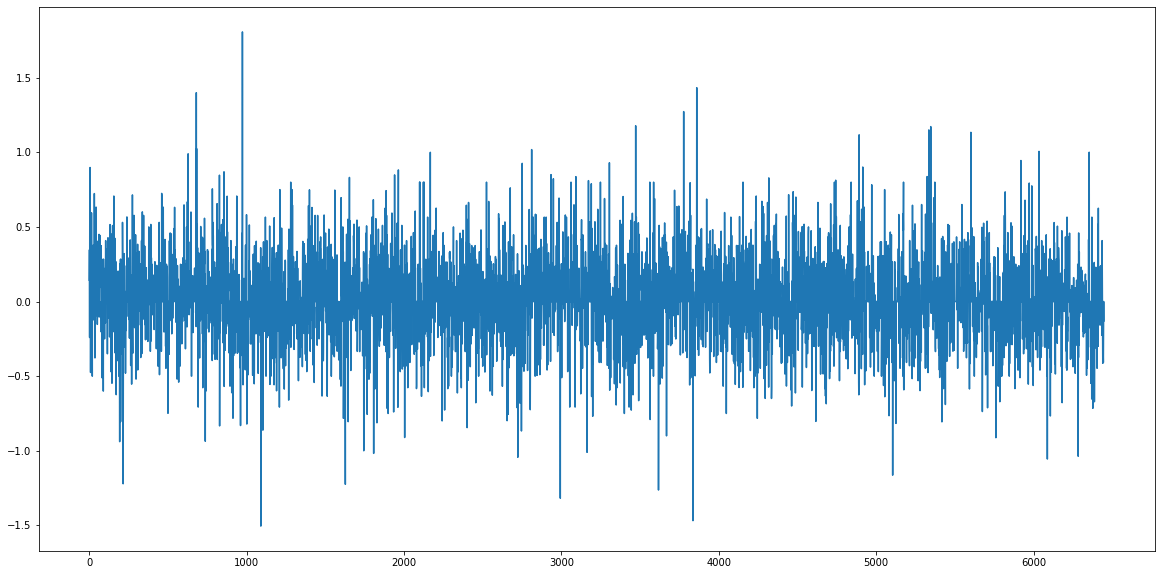

In [65]:
corpus_sents_df['jockers_rinker'].plot()

Text(0.5, 1.0, 'Machines Like Me by: Ian McEwan\nSentence Sentiment StdScaler SMA 10%')

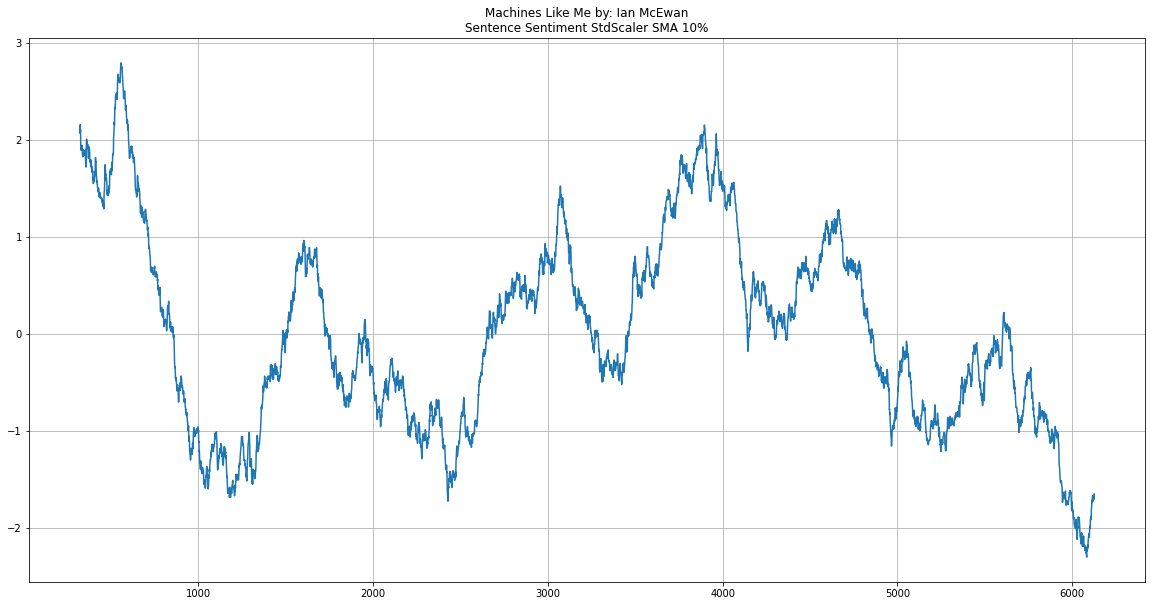

In [54]:
plt.rcParams["figure.figsize"] = (20,10)
corpus_sents_df['jockers_rinker_stdscaler_roll10'].plot()
plt.grid()
plt.title(f'{CORPUS_FULL}\nSentence Sentiment StdScaler SMA 10%')

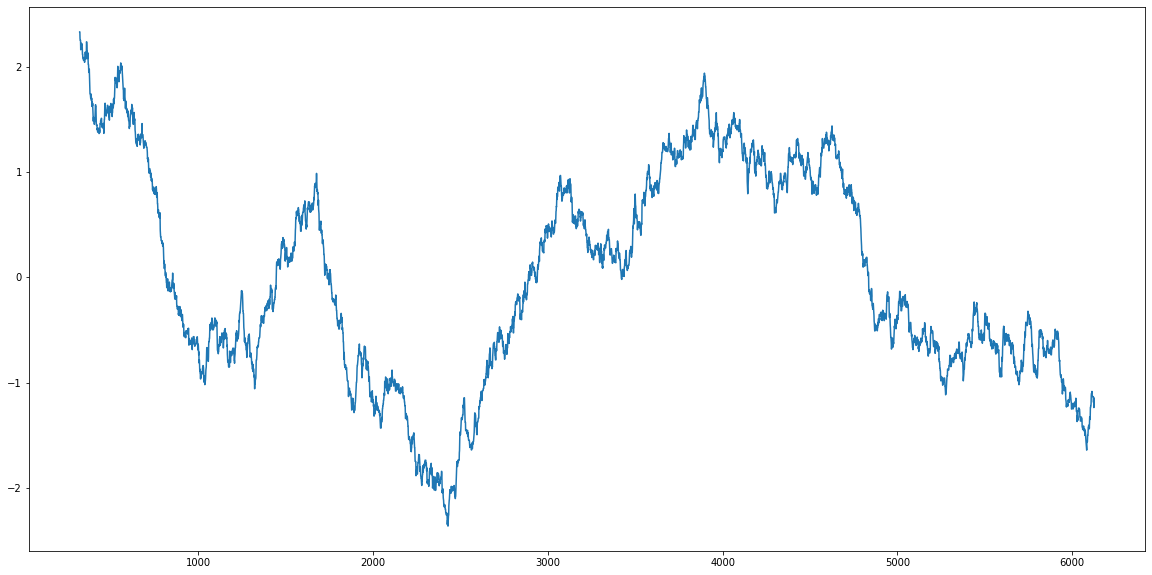

In [70]:
corpus_sents_df['nrc_stdscaler_roll10'].plot()

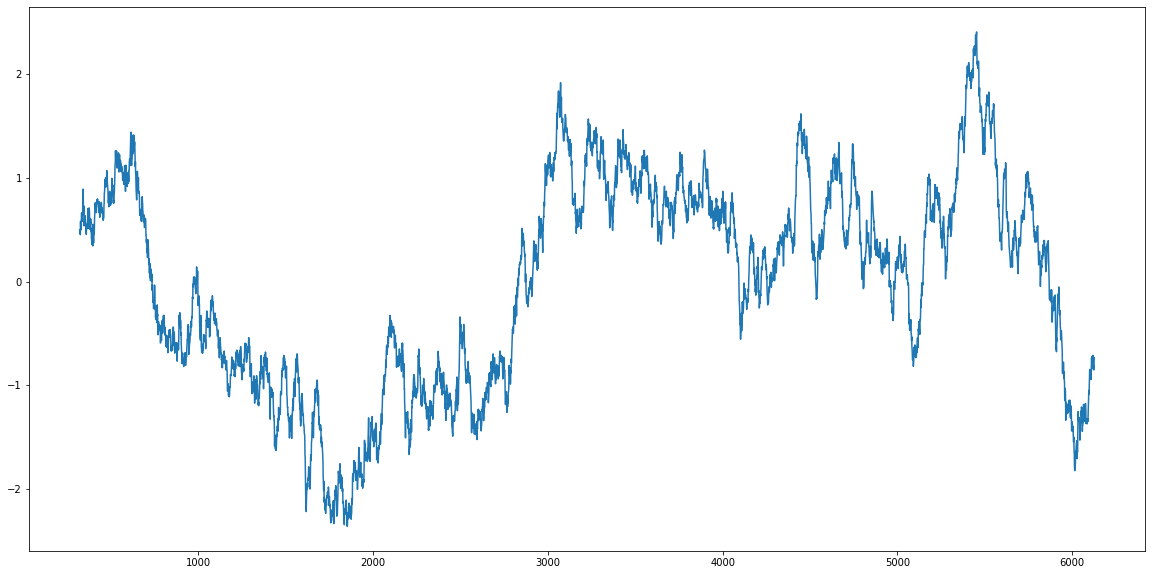

In [69]:
corpus_sents_df['sentiword_stdscaler_roll10'].plot()

## **Hierarichical Clustered Time Series**

In [34]:
%%time

# Italy Power Demand time series are loaded in a pd.Series format.
# The dtw_distance function expects series to be shaped as a (l, m) array, 
# where l=length of series, m=# dimensions        

series_list = data['dim_0'].values
for i in range(len(series_list)):
    length = len(series_list[i])
    # series_list[i] = series_list[i].values.reshape((length, 1))
    series_list[i] = series_list[i].values.reshape((length, 1))

# Initialize distance matrix
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))

# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list[i]
        y = series_list[j]
        if i != j:
            dist = dtw_distance(x, y)
            distance_matrix[i, j] = dist

CPU times: user 29.4 s, sys: 4.61 ms, total: 29.4 s
Wall time: 29.4 s


/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


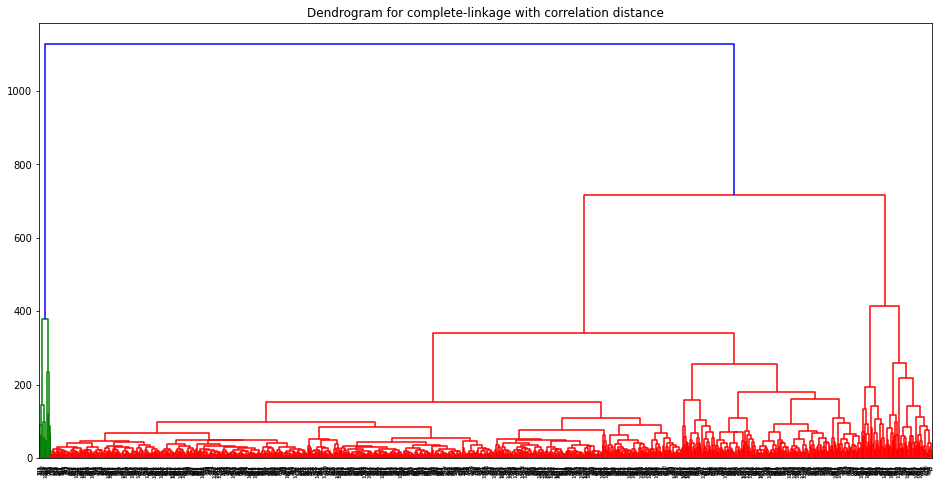

In [18]:
def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

linkage_matrix = hierarchical_clustering(distance_matrix)

In [19]:
# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 4 unique clusters
cluster_labels = fcluster(linkage_matrix, 10, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 10 unique clusters

# hand-select an appropriate cut-off on the dendrogram
cluster_labels = fcluster(linkage_matrix, 600, criterion='distance')
print(np.unique(cluster_labels))
#>> 3 unique clusters
cluster_labels = fcluster(linkage_matrix, 800, criterion='distance')
print(np.unique(cluster_labels))
#>> 2 unique clusters

[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3]
[1 2]


## **LTTB Largest Triangle Three Buckets**

* https://sr.ht/~javiljoen/lttb/

In [20]:
!pip install lttb

In [21]:
import numpy as np
import lttb

In [172]:
# Generate an example data set of 100 random points:
#  - column 0 represents time values (strictly increasing)
#  - column 1 represents the metric of interest: CPU usage, stock price, etc.
data = np.array([range(100), np.random.random(100)]).T

In [299]:
data.shape

(100, 2)

In [300]:
data2 = np.array(corpus_sents_df[['sent_no','jockers_rinker_stdscaler_roll10']])

In [175]:
data2 = np.array(corpus_sents_df[['sent_no','jockers_rinker', 'jockers_rinker_stdscaler_roll10']])

In [301]:
data2.shape

(6448, 2)

In [302]:
data2[320:325]

array([[321.        ,          nan],
       [322.        ,          nan],
       [323.        ,   2.12299209],
       [324.        ,   2.10802433],
       [325.        ,   2.07170795]])

In [72]:
lowess = sm.nonparametric.lowess

In [191]:
x = np.array(corpus_sents_df['sent_no'])
x.shape
x_ls = list(x)
len(x_ls)

6448

In [194]:
y = np.array(corpus_sents_df['jockers_rinker_stdscaler_roll10'])
y.shape
y_ls = list(y)
len(y_ls)
y_ls[1000:1010]

[-0.9848620925716576,
 -1.0129701282334571,
 -0.9953895977814146,
 -1.1185606016155198,
 -1.1086624241440073,
 -1.2160124065732498,
 -1.202395975602449,
 -1.219193739790036,
 -1.274747123067863,
 -1.3390762775457519]

In [182]:
win_s1per = int(x.shape[0]*1/100)

In [254]:
y_roll10 = 90*np.array(corpus_sents_df['jockers_rinker'].rolling(10*win_s1per, center=True, min_periods=1).mean())
y_roll10[:10]

array([3.69733221, 3.66808164, 3.66264911, 3.71246201, 3.70100379,
       3.7596727 , 3.77900593, 3.82363029, 3.70907654, 3.72227037])

In [255]:
df = pd.DataFrame({'sent_no':x_ls, 'sentiment_roll10':y_ls}) #  list(y_roll10[0]), columns=['sent_no', 'sentiment_roll10'])
df.shape

(6448, 2)

In [256]:
df.head()

,sent_no,sentiment_roll10
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


In [257]:
df['sentiment_roll10']=df['sentiment_roll10'].interpolate(method='spline', order=2)

In [258]:
df.tail()

,sent_no,sentiment_roll10
6443,6444,-0.932761
6444,6445,-0.933354
6445,6446,-0.933948
6446,6447,-0.934541
6447,6448,-0.935135


In [259]:
df['sentiment_roll10'][:10]

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: sentiment_roll10, dtype: float64

In [260]:
df['sentiment_roll10_interp']=df['sentiment_roll10'].interpolate(method='spline', order=3, limit_direction='both')
df['sentiment_roll10_interp'][:10]

0    2.200221
1    2.197102
2    2.193985
3    2.190871
4    2.187759
5    2.184650
6    2.181542
7    2.178437
8    2.175335
9    2.172234
Name: sentiment_roll10_interp, dtype: float64

In [265]:
# df.ewm(com=0.5).mean()

df['sentiment_roll10_ewm']=df['sentiment_roll10'].ewm(span=10).mean() # win_s1per).mean()

In [262]:
ema10 = data['Price'].ewm(span=10).mean()

IndexError: ignored

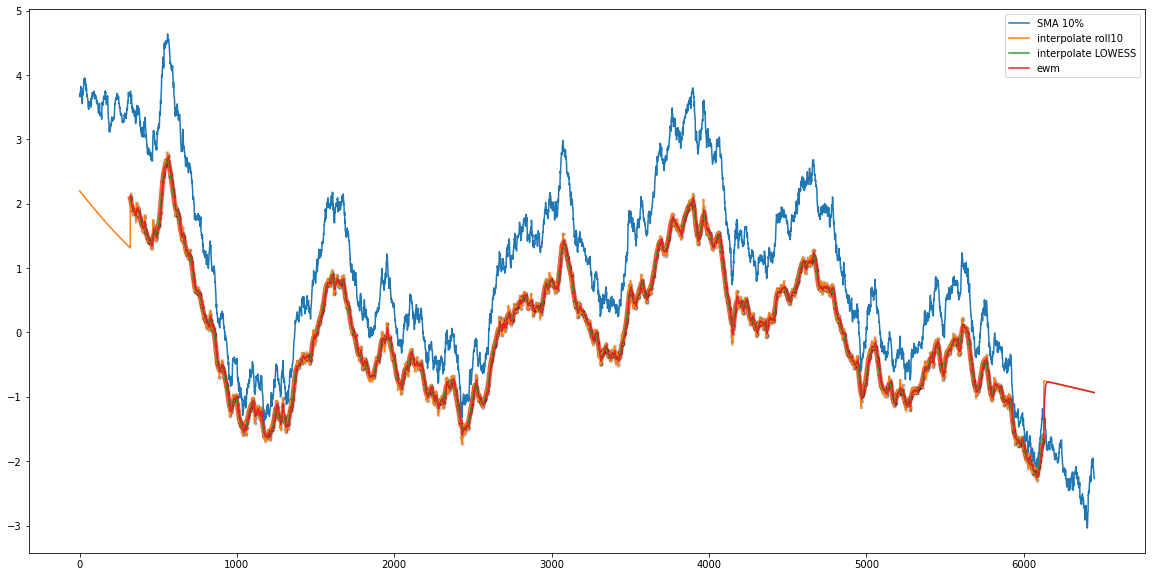

In [287]:
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess

sm_x, sm_y = sm_lowess(y, x,  frac=1./160., it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato', linewidth=5)
# sm_x, sm_y = sm_lowess(y, x,  frac=1./20., it=5, return_sorted = True).T
# plt.plot(sm_x, sm_y, color='green', linewidth=5, alpha=0.3)
# plt.plot(x,)
plt.plot(x, y, 'k.', alpha=0.1)
plt.plot(x, y_roll10, label='SMA 10%')
plt.plot(x, df.sentiment_roll10_interp, label='interpolate roll10')
plt.plot(sm_x, sm_y, label='interpolate LOWESS')
plt.plot(x, df.sentiment_roll10_ewm, label='ewm')
plt.legend(loc='best')

In [276]:
w = lowess(y_roll10, x, frac=1./3., it=0)

In [277]:
x2 = np.array(range(w.shape[0]))

In [280]:
!pip install moepy

     |████████████████████████████████| 76 kB 2.7 MB/s 
     |████████████████████████████████| 28.5 MB 1.8 MB/s 
     |████████████████████████████████| 10.3 MB 49.4 MB/s 
     |████████████████████████████████| 11.5 MB 36.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following 

In [281]:
from moepy import lowess, eda

In [282]:
lowess_model = lowess.Lowess()

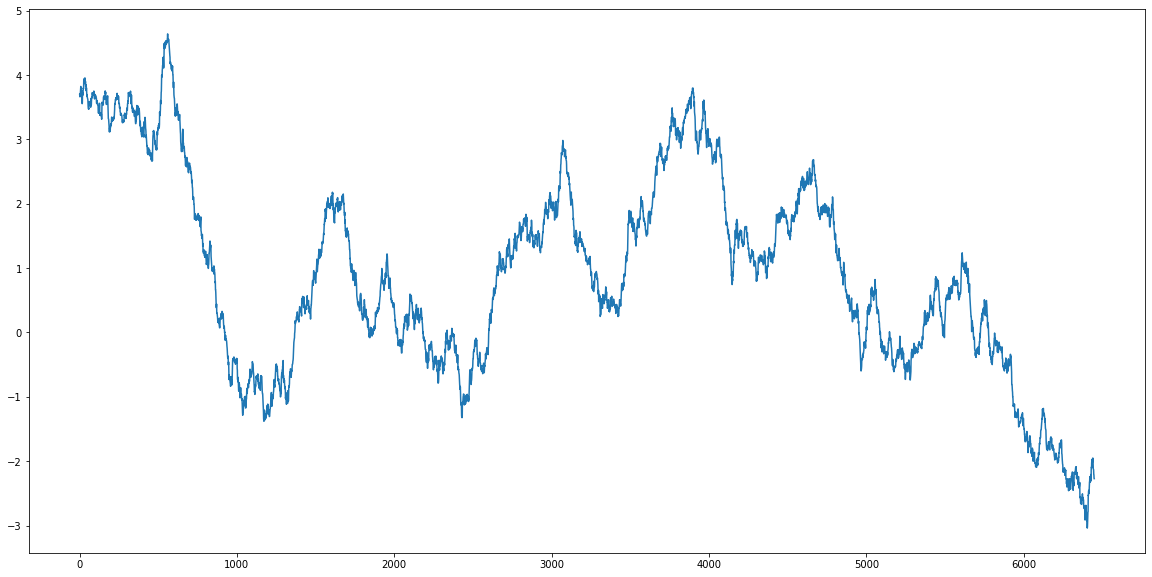

In [290]:
plt.plot(x, y_roll10)

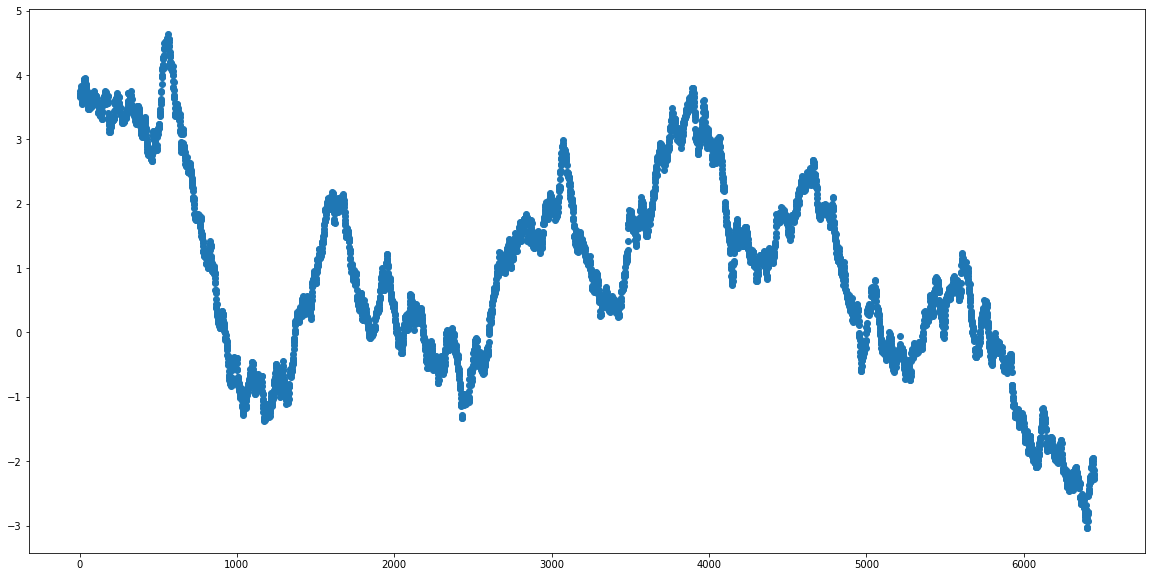

In [291]:
plt.scatter(x, y_roll10)

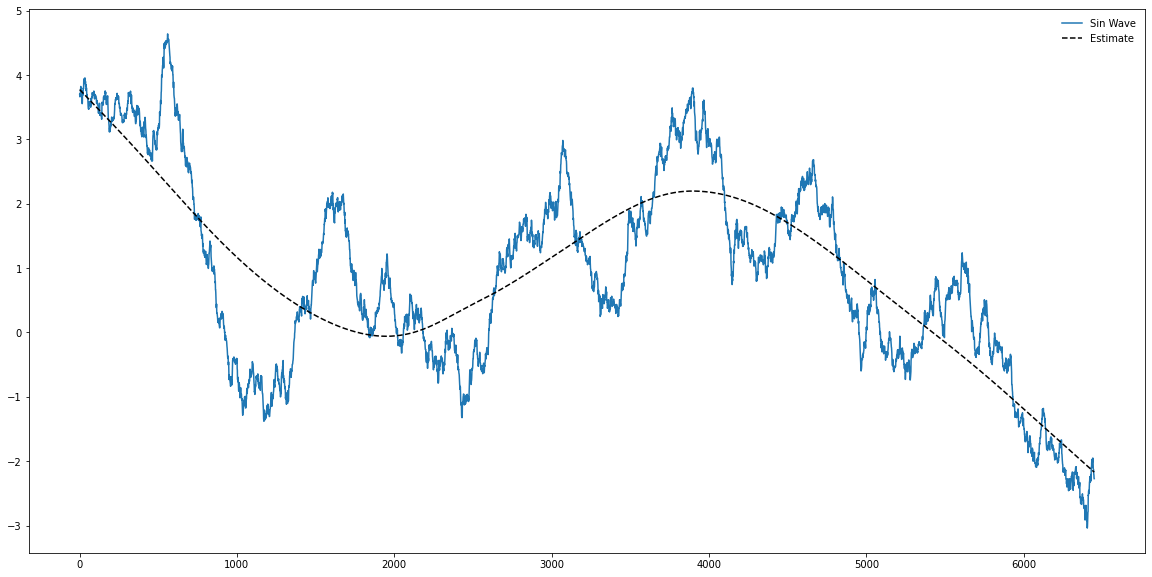

In [292]:
lowess_model.fit(x, y_roll10)

# x_pred = x # np.linspace(0, 6448, 100)
y_pred = lowess_model.predict(x)

# Plotting
plt.plot(x, y_roll10, label='Sin Wave', zorder=2)
plt.plot(x, y_pred, '--', label='Estimate', color='k', zorder=3)
# plt.scatter(x, y_roll10, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)
# plt.xlim(0, 5)

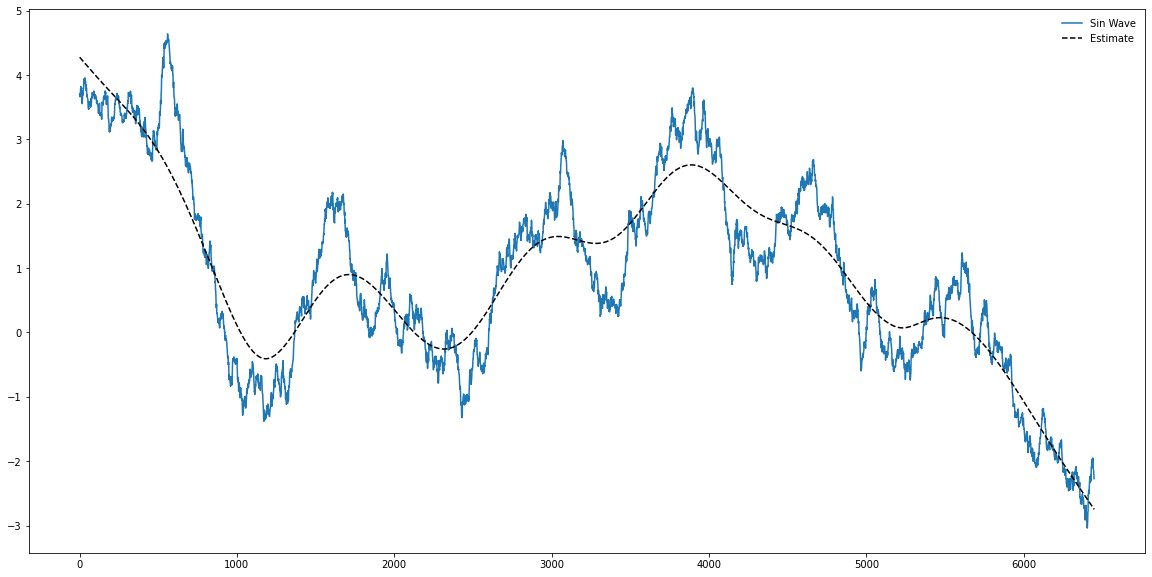

In [294]:
lowess_model.fit(x, y_roll10, frac=0.2)

# x_pred = x # np.linspace(0, 6448, 100)
y_pred = lowess_model.predict(x)

# Plotting
plt.plot(x, y_roll10, label='Sin Wave', zorder=2)
plt.plot(x, y_pred, '--', label='Estimate', color='k', zorder=3)
# plt.scatter(x, y_roll10, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)
# plt.xlim(0, 5)

In [305]:
df['sentiment_roll10_lowess01'] = y_pred

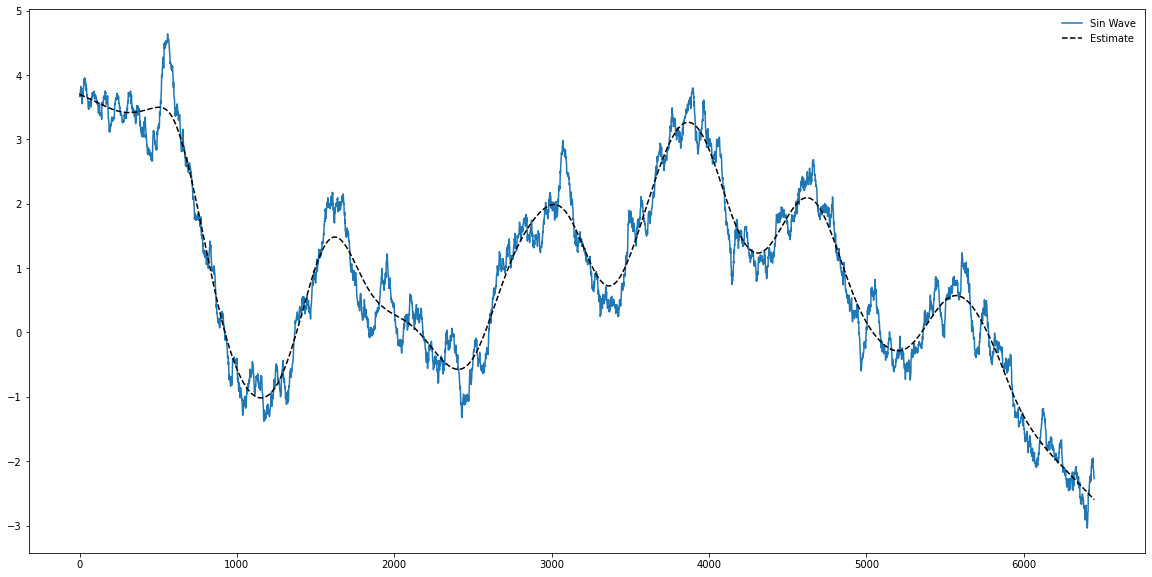

In [303]:
# lowess_model.fit(x, y_roll10, frac=0.1)

# x_pred = x # np.linspace(0, 6448, 100)
y_pred = lowess_model.predict(x)

# Plotting
plt.plot(x, y_roll10, label='Sin Wave', zorder=2)
plt.plot(x, y_pred, '--', label='Estimate', color='k', zorder=3)
# plt.scatter(x, y_roll10, label='With Noise', color='C1', s=5, zorder=1)
plt.legend(frameon=False)
# plt.xlim(0, 5)

In [296]:
df_bootstrap = lowess.bootstrap_model(
    x, 
    y_roll10, 
    num_runs=1000, 
    model=lowess.Lowess(), 
    frac=0.1, 
    num_fits=20
)

df_bootstrap.head()

100%|██████████| 1000/1000 [01:14<00:00, 13.49it/s]


bootstrap_run,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.713141,3.699579,3.683989,3.694000,3.709203,3.726796,3.684939,3.683583,3.721200,3.736464,3.681006,3.721052,3.715609,3.677165,3.681688,3.691377,3.741167,3.756454,3.706945,3.715274,3.720599,3.697723,3.715274,3.701494,3.696577,3.693458,3.687843,3.694828,3.696880,3.724194,3.750417,3.721893,3.710445,3.711579,3.713905,3.724336,3.714779,3.736711,3.685726,3.706419,...,3.689897,3.735875,3.746889,3.699516,3.721880,3.690427,3.698103,3.690265,3.683812,3.699723,3.695817,3.714127,3.709971,3.686283,3.704363,3.658125,3.682804,3.718586,3.694867,3.677758,3.718458,3.680189,3.691876,3.708044,3.707079,3.740282,3.724122,3.690110,3.715035,3.646342,3.724280,3.632733,3.714560,3.711426,3.693955,3.707272,3.741848,3.672290,3.684993,3.748800
2,3.712169,3.698583,3.683219,3.692979,3.708336,3.725701,3.684081,3.682789,3.720138,3.735153,3.680269,3.719946,3.714478,3.676427,3.680838,3.690446,3.739889,3.755168,3.705957,3.714239,3.719449,3.696760,3.714176,3.700346,3.695636,3.692687,3.686852,3.693786,3.695883,3.723131,3.749137,3.720816,3.709470,3.710532,3.712923,3.723200,3.713574,3.735593,3.684722,3.705350,...,3.688908,3.734780,3.745614,3.698534,3.720717,3.689446,3.697176,3.689414,3.682979,3.698767,3.694854,3.713102,3.708949,3.685436,3.703324,3.657323,3.681972,3.717485,3.693929,3.677012,3.717548,3.679280,3.690923,3.707038,3.706023,3.739167,3.723012,3.689190,3.714023,3.645556,3.723145,3.632178,3.713515,3.710326,3.692954,3.706188,3.740666,3.671466,3.683998,3.747491
3,3.711197,3.697588,3.682448,3.691958,3.707469,3.724607,3.683224,3.681996,3.719076,3.733843,3.679533,3.718840,3.713347,3.675690,3.679988,3.689515,3.738611,3.753882,3.704968,3.713203,3.718300,3.695796,3.713078,3.699199,3.694696,3.691916,3.685861,3.692745,3.694886,3.722069,3.747857,3.719739,3.708496,3.709486,3.711940,3.722065,3.712370,3.734475,3.683719,3.704282,...,3.687918,3.733685,3.744340,3.697552,3.719555,3.688465,3.696249,3.688564,3.682146,3.697811,3.693890,3.712076,3.707927,3.684588,3.702285,3.656522,3.681139,3.716384,3.692990,3.676265,3.716637,3.678372,3.689970,3.706032,3.704967,3.738053,3.721901,3.688269,3.713012,3.644770,3.722009,3.631623,3.712469,3.709226,3.691953,3.705103,3.739483,3.670642,3.683004,3.746183
4,3.710225,3.696592,3.681678,3.690938,3.706602,3.723513,3.682366,3.681202,3.718014,3.732532,3.678796,3.717734,3.712216,3.674952,3.679138,3.688584,3.737334,3.752596,3.703980,3.712168,3.717150,3.694833,3.711979,3.698051,3.693755,3.691145,3.684871,3.691703,3.693890,3.721006,3.746576,3.718662,3.707522,3.708439,3.710958,3.720929,3.711165,3.733357,3.682716,3.703213,...,3.686928,3.732590,3.743065,3.696570,3.718392,3.687484,3.695322,3.687714,3.681313,3.696855,3.692926,3.711050,3.706904,3.683741,3.701246,3.655720,3.680306,3.715283,3.692052,3.675518,3.715727,3.677463,3.689017,3.705026,3.703912,3.736938,3.720791,3.687348,3.712000,3.643984,3.720874,3.631069,3.711424,3.708125,3.690952,3.704019,3.738300,3.669818,3.682009,3.744874
5,3.709253,3.695597,3.680907,3.689917,3.705734,3.722418,3.681508,3.680408,3.716952,3.731222,3.678060,3.716629,3.711085,3.674214,3.678288,3.687653,3.736056,3.751310,3.702991,3.711132,3.716001,3.693870,3.710881,3.696904,3.692814,3.690374,3.683880,3.690662,3.692893,3.719943,3.745296,3.717586,3.706547,3.707392,3.709975,3.719794,3.709960,3.732240,3.681712,3.702144,...,3.685938,3.731496,3.741790,3.695588,3.717230,3.686503,3.694395,3.686863,3.680480,3.695899,3.691962,3.710024,3.705882,3.682893,3.700207,3.654918,3.679473,3.714182,3.691114,3.674771,3.714816,3.676554,3.688064,3.704020,3.702856,3.735824,3.719681,3.686427,3.710989,3.643199,3.719738,3.630514,3.710378,3.707025,3.689951,3.702935,3.737118,3.668994,3.681014,3.743565

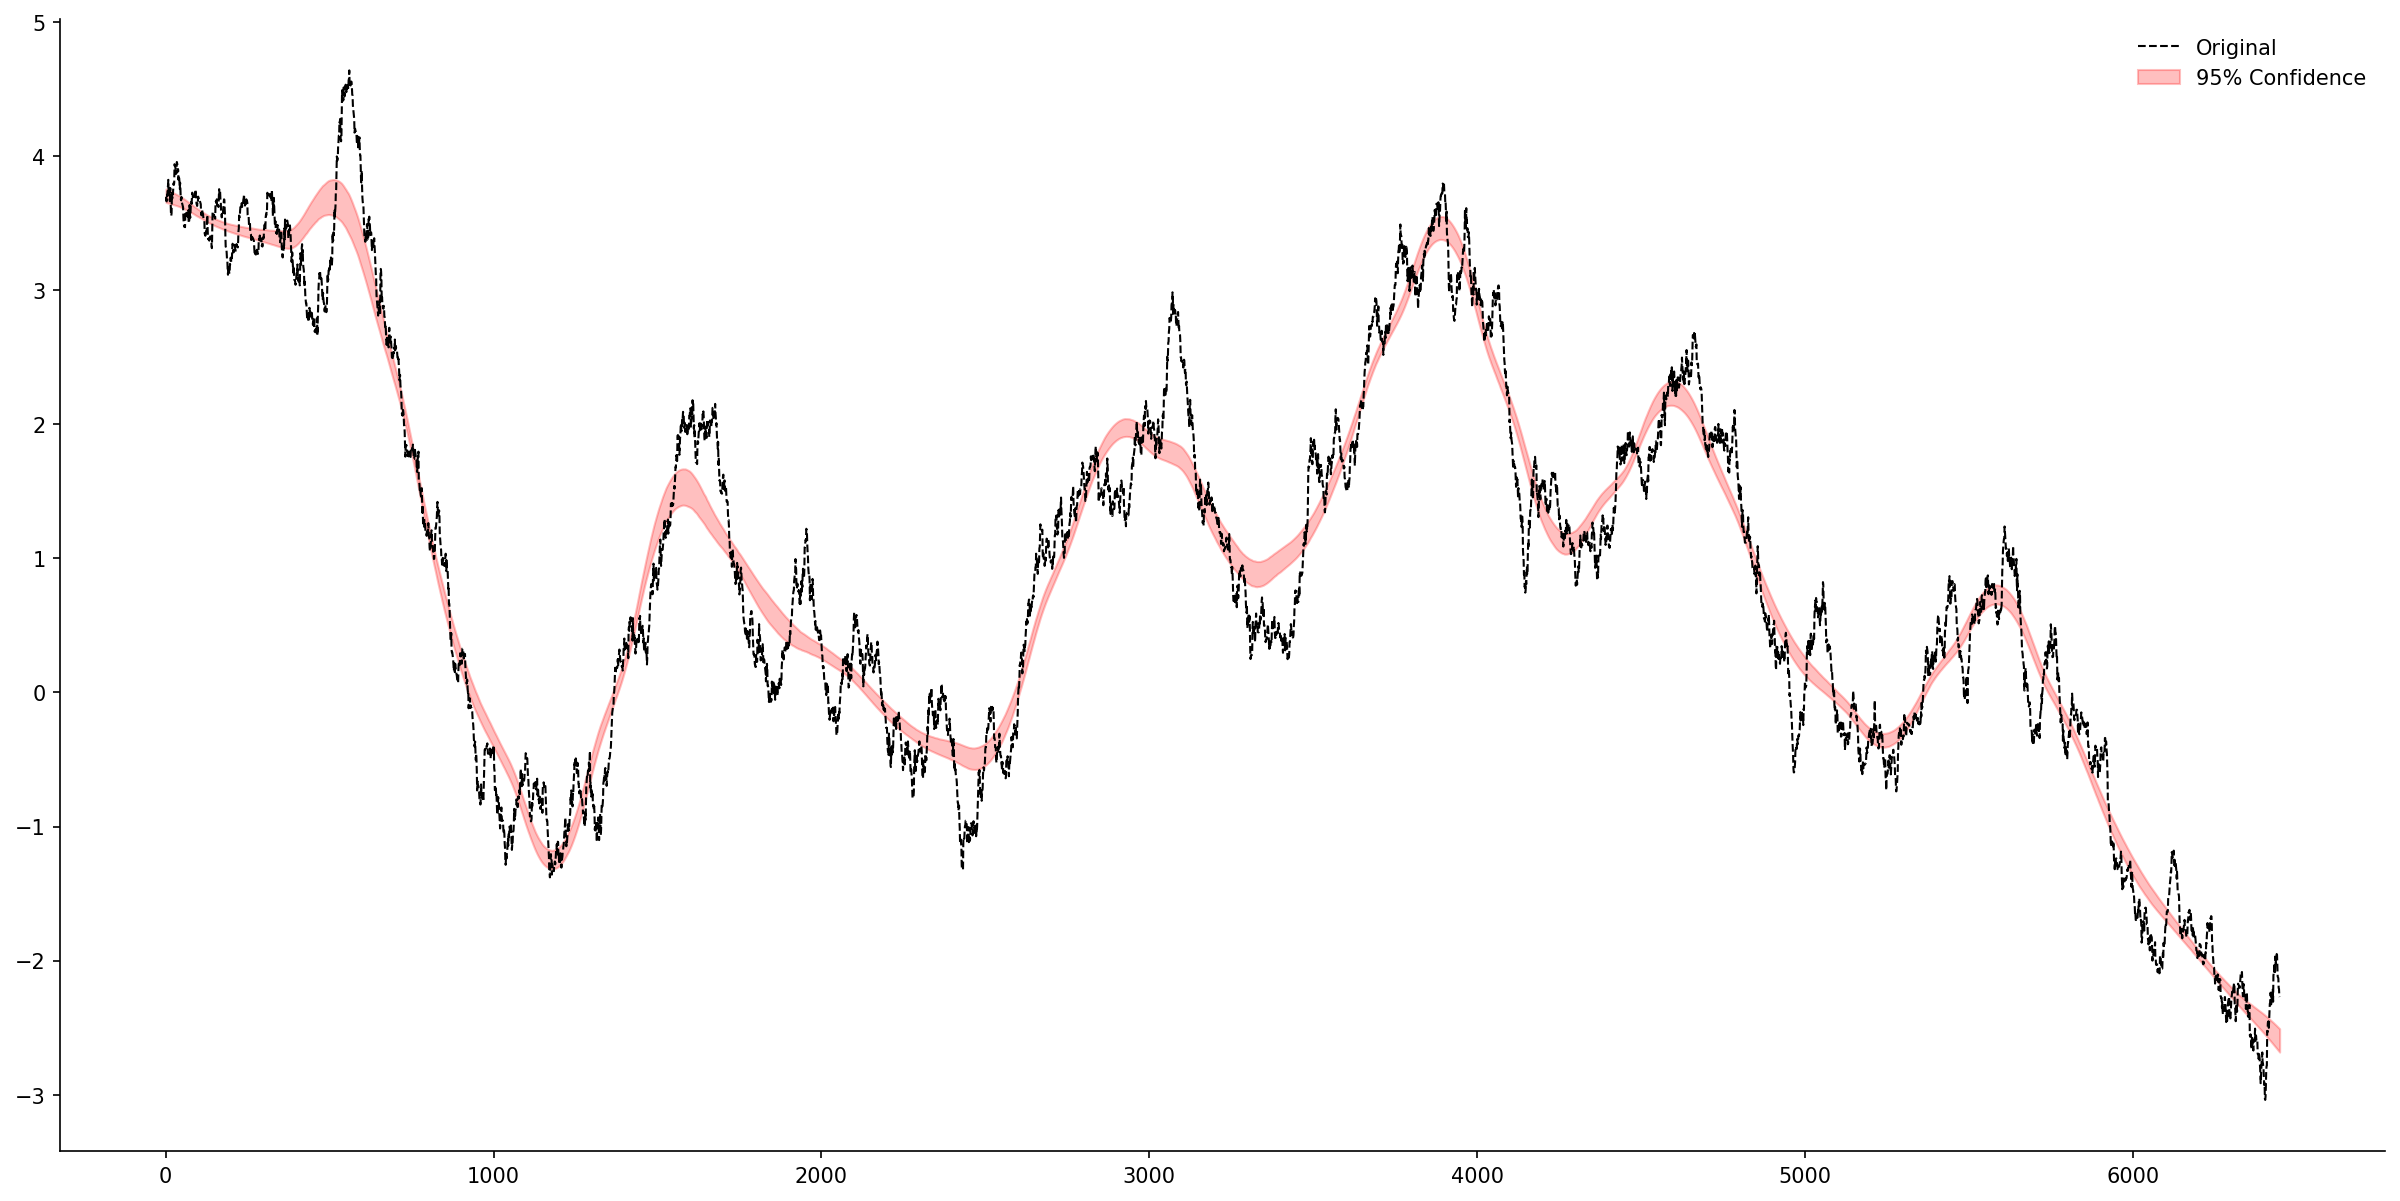

In [298]:
df_conf_intvl = lowess.get_confidence_interval(df_bootstrap, conf_pct=0.95)

# Plotting
fig, ax = plt.subplots(dpi=150)

ax.plot(x, y_roll10, 'k--', label='Original', linewidth=1, zorder=2)
ax.fill_between(df_conf_intvl.index, df_conf_intvl['min'], df_conf_intvl['max'], color='r', edgecolor='k', alpha=0.25, label='95% Confidence')
# ax.scatter(x, y_noisy, label='With Noise', color='w', edgecolor='k', linewidth=0.3, s=2.5, zorder=1)

ax.legend(frameon=False)
# ax.set_xlim(0, 10)
eda.hide_spines(ax)

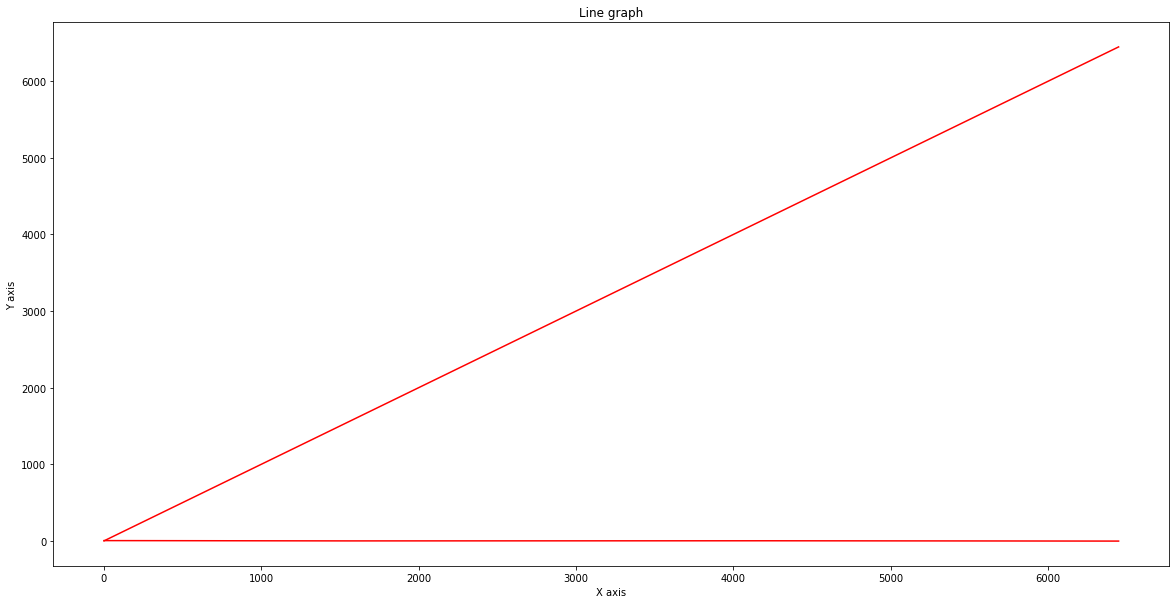

In [278]:
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, w, color ="red")
plt.show()

In [ ]:
z = lowess(y, x)
>>> w = lowess(y, x, frac=1./3)

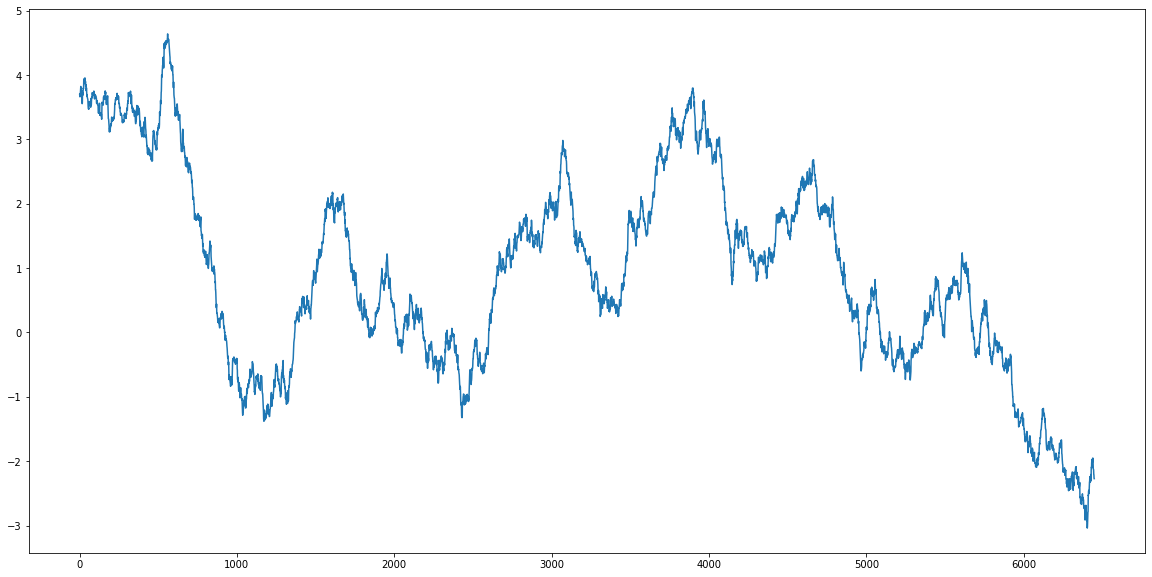

In [279]:
plt.plot(x, y_roll10, label='SMA 10%')

In [325]:
df.sentiment_roll10_interp

0       2.200221
1       2.197102
2       2.193985
3       2.190871
4       2.187759
          ...   
6443   -0.932761
6444   -0.933354
6445   -0.933948
6446   -0.934541
6447   -0.935135
Name: sentiment_roll10_interp, Length: 6448, dtype: float64

In [331]:
data2 = df[['sent_no', 'sentiment_roll10_interp']].to_numpy()
# data2 = np.squeeze(data2)

In [332]:
data2.shape

(6448, 2)

In [342]:
# Downsample it to 20 points:
small_data = lttb.downsample(data2, n_out=100)
assert small_data.shape == (100, 2)

In [334]:
# No input validation:
small_data = lttb.downsample(data, n_out=20, validators=[])

In [335]:
# Stricter check on x values:
from lttb.validators import *
small_data = lttb.downsample(data, n_out=20, validators=[has_two_columns, x_is_regular])

In [343]:
small_data.shape

(100, 2)

In [344]:
small_data[:,0]

array([1.000e+00, 5.200e+01, 1.110e+02, 1.730e+02, 2.650e+02, 3.260e+02,
       3.410e+02, 4.610e+02, 4.680e+02, 5.580e+02, 6.080e+02, 7.010e+02,
       7.290e+02, 8.320e+02, 8.880e+02, 9.570e+02, 1.041e+03, 1.100e+03,
       1.180e+03, 1.249e+03, 1.313e+03, 1.381e+03, 1.431e+03, 1.466e+03,
       1.576e+03, 1.606e+03, 1.678e+03, 1.725e+03, 1.838e+03, 1.861e+03,
       1.954e+03, 2.025e+03, 2.104e+03, 2.172e+03, 2.203e+03, 2.280e+03,
       2.364e+03, 2.430e+03, 2.508e+03, 2.564e+03, 2.629e+03, 2.667e+03,
       2.740e+03, 2.798e+03, 2.884e+03, 2.963e+03, 3.033e+03, 3.072e+03,
       3.164e+03, 3.176e+03, 3.298e+03, 3.347e+03, 3.424e+03, 3.493e+03,
       3.534e+03, 3.630e+03, 3.691e+03, 3.730e+03, 3.764e+03, 3.894e+03,
       3.927e+03, 3.965e+03, 4.065e+03, 4.145e+03, 4.177e+03, 4.262e+03,
       4.299e+03, 4.368e+03, 4.433e+03, 4.513e+03, 4.596e+03, 4.666e+03,
       4.694e+03, 4.783e+03, 4.820e+03, 4.943e+03, 4.967e+03, 5.053e+03,
       5.102e+03, 5.151e+03, 5.250e+03, 5.288e+03, 

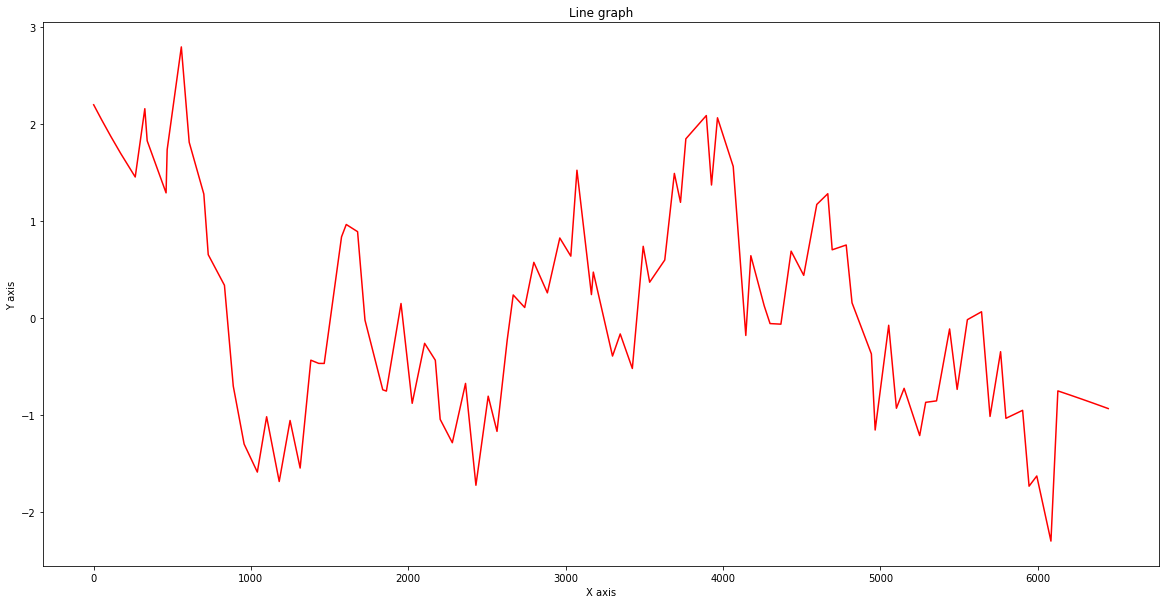

In [345]:
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(small_data[:,0], small_data[:,1], color ="red")
plt.show()

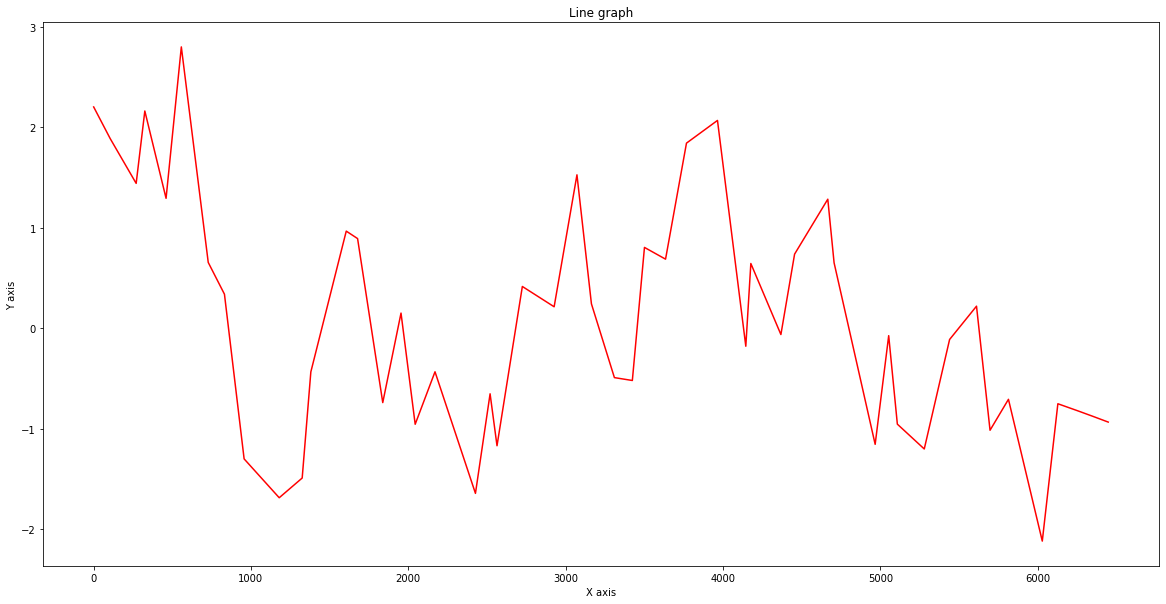

In [346]:
# Downsample it to 20 points:
small_data = lttb.downsample(data2, n_out=50)
assert small_data.shape == (50, 2)

# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(small_data[:,0], small_data[:,1], color ="red")
plt.show()

In [347]:
small_data

array([[ 1.00000000e+00,  2.20022073e+00],
       [ 1.06000000e+02,  1.88522989e+00],
       [ 2.71000000e+02,  1.43973313e+00],
       [ 3.26000000e+02,  2.15979289e+00],
       [ 4.61000000e+02,  1.29108038e+00],
       [ 5.58000000e+02,  2.79744055e+00],
       [ 7.29000000e+02,  6.53118245e-01],
       [ 8.32000000e+02,  3.37277443e-01],
       [ 9.57000000e+02, -1.30135384e+00],
       [ 1.18000000e+03, -1.68777962e+00],
       [ 1.32600000e+03, -1.49164455e+00],
       [ 1.38100000e+03, -4.35681476e-01],
       [ 1.60600000e+03,  9.64695058e-01],
       [ 1.67800000e+03,  8.90564620e-01],
       [ 1.83800000e+03, -7.41246048e-01],
       [ 1.95400000e+03,  1.49301428e-01],
       [ 2.04400000e+03, -9.56776605e-01],
       [ 2.17000000e+03, -4.34659578e-01],
       [ 2.42700000e+03, -1.64438305e+00],
       [ 2.52000000e+03, -6.53787476e-01],
       [ 2.56400000e+03, -1.17059553e+00],
       [ 2.72500000e+03,  4.14085737e-01],
       [ 2.92700000e+03,  2.12125245e-01],
       [ 3.

# **Workflow**

1. Process Text into Sentences
2. Calculate Sentence Sentiment
3. SMA/StdScaler Smooth/Standardize
4. Crux Detection/Clusters (Metric)
5. LTTB Dim Reduction
6. Crux Verification/Shift
7. Hierarchical TS Clustering
8. Arc Similiarity (Metric)